# Basic Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Alignment

As the data is available in census-bureau.data and columns are available in census-bureau.columns, we combine them into the same dataframe so we could perform our operations on them easily

In [3]:
data= pd.read_csv("census-bureau.data", header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
data_columns= pd.read_csv("census-bureau.columns", header=None)
data_columns

,0
0,age
1,class of worker
2,detailed industry recode
3,detailed occupation recode
4,education
5,wage per hour
6,enroll in edu inst last wk
7,marital stat
8,major industry code
9,major occupation code


In [6]:
# Assign column names to data
data.columns = data_columns.iloc[:,0].astype(str).str.strip().tolist()

# Column names cleaned to avoid any issue during training. We replace spaces with underscores, remove non-alphanumerics, and
# make lowercase and ensure uniqueness by appending an index for duplicates.
import re
clean_cols = []
seen = {}
for c in data.columns:
    c_clean = re.sub(r'[^0-9A-Za-z_]', '', c.strip().replace(' ', '_')).lower()
    if c_clean in seen:
        seen[c_clean] += 1
        c_clean = f"{c_clean}_{seen[c_clean]}"
    else:
        seen[c_clean] = 0
    clean_cols.append(c_clean)
data.columns = clean_cols
print('Sample cleaned column names:', data.columns[:10])

Sample cleaned column names: Index(['age', 'class_of_worker', 'detailed_industry_recode',
       'detailed_occupation_recode', 'education', 'wage_per_hour',
       'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code',
       'major_occupation_code'],
      dtype='object')


In [7]:
data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Exploratory Data Analysis (EDA) 

- Inspect dataset shape, types, and missing values.
- Understand the target variable (income >50K or <=50K).
- Explore distributions of numerical features and categories.
- Check correlations and potential preprocessing steps.

In [8]:
# Basic inspection
print('Shape:', data.shape)
print('\nColumns:')
print(list(data.columns))
print('\nDtype counts:')
print(data.dtypes.value_counts())
print('\nFirst 5 rows:')
display(data.head())

Shape: (199523, 42)

Columns:
['age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'weight', 'migration_codechange_in_msa', 'migration_codechange_in_reg', 'migration_codemove_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_admin', 'veterans

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [9]:
# Trim whitespace for object columns
for c in data.select_dtypes(include=['object']).columns:
    data[c] = data[c].astype(str).str.strip()

# Missing values summary
missing = data.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(data)) * 100
print("Missing Values Summary:")
print(missing)
print("\n")
print("Missing Value Percentages Summary:")
print(missing_pct)


Missing Values Summary:
age                                          0
family_members_under_18                      0
detailed_household_summary_in_household      0
weight                                       0
migration_codechange_in_msa                  0
migration_codechange_in_reg                  0
migration_codemove_within_reg                0
live_in_this_house_1_year_ago                0
migration_prev_res_in_sunbelt                0
num_persons_worked_for_employer              0
country_of_birth_father                      0
class_of_worker                              0
country_of_birth_mother                      0
country_of_birth_self                        0
citizenship                                  0
own_business_or_self_employed                0
fill_inc_questionnaire_for_veterans_admin    0
veterans_benefits                            0
weeks_worked_in_year                         0
year                                         0
detailed_household_and_family_stat  

### Target variable

The target variable in our case is the Label, to identify 2 marketing groups: People who earn an income of less than $50,000 and those who earn more
than $50,000. 

We encode -50000. label as 0 (indicating lt 50,000 income) and 50000+. label as 1 (indicating gt 50,000 income)

In [10]:
data['label'].value_counts()

label
- 50000.    187141
50000+.      12382
Name: count, dtype: int64

In [11]:
data['label'] = data['label'].str.strip().map({'- 50000.': 0, '50000+.': 1})
data['label'] = data['label'].astype('category')
data['label'].value_counts()

label
0    187141
1     12382
Name: count, dtype: int64

### Numerical features summary

Descriptive statistics and skewed features.

In [12]:
num = data.select_dtypes(include=[np.number])
print('Numerical columns count:', num.shape[1])
display(num.describe().T)
print('\nSkewness:')
display(num.skew().sort_values(ascending=False))

Numerical columns count: 13


,count,mean,std,min,25%,50%,75%,max
age,199523.0,34.494199,22.310895,0.00,15.000,33.00,50.00,90.0
detailed_industry_recode,199523.0,15.352320,18.067129,0.00,0.000,0.00,33.00,51.0
detailed_occupation_recode,199523.0,11.306556,14.454204,0.00,0.000,0.00,26.00,46.0
wage_per_hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital_gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital_losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends_from_stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num_persons_worked_for_employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
own_business_or_self_employed,199523.0,0.175438,0.553694,0.00,0.000,0.00,0.00,2.0



Skewness:


dividends_from_stocks              27.786502
capital_gains                      18.990822
wage_per_hour                       8.935097
capital_losses                      7.632565
own_business_or_self_employed       2.912744
weight                              1.432733
detailed_occupation_recode          0.829238
num_persons_worked_for_employer     0.751561
detailed_industry_recode            0.516688
age                                 0.373290
weeks_worked_in_year                0.210169
year                                0.001313
veterans_benefits                  -1.200994
dtype: float64

In [13]:
data['detailed_industry_recode'].value_counts()

detailed_industry_recode
0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: count, dtype: int64

In [14]:
data['detailed_occupation_recode'].value_counts()

detailed_occupation_recode
0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
41      1592
44      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: count, dtype: int64

The detailed occupation and industry recodes are CPS classification identifiers represented as integers. While categorical in nature, these fields were not converted or used in modeling due to their high cardinality and redundancy with the corresponding major codes. The major occupation and industry codes were preferred to achieve a better bias–variance tradeoff.

In [15]:
data['year'].value_counts()

year
94    99827
95    99696
Name: count, dtype: int64

In [16]:
data['own_business_or_self_employed'].value_counts()

own_business_or_self_employed
0    180672
2     16153
1      2698
Name: count, dtype: int64

In [17]:
pd.crosstab(
    data['own_business_or_self_employed'],
    data['num_persons_worked_for_employer']
)

num_persons_worked_for_employer,0,1,2,3,4,5,6
own_business_or_self_employed,,,,,,,
0,95983,19060,8031,10793,11704,4931,30170
1,0,763,305,348,341,132,809
2,0,3286,1745,2284,2334,972,5532


Our understanding for 'own_buiness_or_self_employed' was that: 
- 0 -> work for someone
- 1-> they work for themselves/not incorporated
- 2 -> they have company/incorporated. 

However, Cross-analysis between own_business_or_self_employed and employer size reveals that value 0 corresponds to wage or salary workers, while values 1 and 2 represent self-employed individuals. Further, value 2 shows strong association with larger employer sizes, consistent with incorporated business ownership.

Similarly, we check for 'class_of_worker' too.

In [18]:
pd.crosstab(
    data['own_business_or_self_employed'],
    data['class_of_worker']
)

class_of_worker,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,Without pay
own_business_or_self_employed,,,,,,,,,
0,2520,6300,435,99153,58776,2859,7156,3330,143
1,78,222,0,114,1574,180,376,151,3
2,327,1262,4,978,11678,226,913,746,19


## Insights, observations and research from above numerical summary:
1. **Age**( min: 0, max: 90, 75% of people have age 50)
2. The **detailed industry recode** and **detailed occupation recode** need to be understood further from the US Census Bureau document from year 1994: https://www2.census.gov/programs-surveys/cps/techdocs/cpsdec94.pdf
3. **Wage_per_hour** needs to be looked into as the 75% is also 0, which indicates that maybe the wages were not hourly mostly.
4. If we look into **weight** particularly and investigate its history from 1994 Census, we understand that:

Working with 1994–1995 industry recodes, the surveys indicate:
- Manufacturing, agriculture, and government workers are not sampled evenly
So, without weights:
- Small industries look too large
- Large service sectors are understated
And with weights:
- Industry employment totals align with BLS & Census benchmarks
This is critical if we are:
- Counting workers by sector
- Computing industry shares
- Comparing industries across years

So, we use weights for analysis and create engineered feature, which may or may not be used in the model.

5. **Own business or self employed** are 2 categories, and max **num of people** working for these employers are 6.
6. Max **weeks_worked_in_year** are 52 with 75% achieving them

In [19]:
# "own_business_or_self_employed", "veterans_benefits", "year" -> These columns should be treated as categorical and not numerical
data['own_business_or_self_employed'] = data['own_business_or_self_employed'].astype('category') #to be figured out to understand 0,1,2 representations
data['veterans_benefits'] = data['veterans_benefits'].astype('category') #to be figured out to understand 0,1,2 representations
data['year'] = data['year'].replace({94: '1994', 95: '1995'})
data['year'] = data['year'].astype('category')

Assuming, 0 -> unknown, 1-> Yes, 2-> No for veteran benefits. But we need to check if that makes sense. So we check the veteran benefits with age.

In [20]:
data['veterans_benefits'].value_counts()

veterans_benefits
2    150130
0     47409
1      1984
Name: count, dtype: int64

In [21]:
pd.crosstab(
    data.loc[data['veterans_benefits'] == 1, 'age'],
    columns='count'
)

col_0,count
age,
16,2
17,1
18,2
19,3
20,5
...,...
86,7
87,2
88,3


Given our assumption that 1 is having veteran benefits, it is surprising how one has veteran benefits at ages 16 onwards. But maybe, it could be because they are dependent on someone who has these benefits. So, we also check 2 other columns having relevant representations/reasoning for veteran_benefits: 'family members under 18' and 'fill inc questionnaire for veteran's admin'. 

In [22]:
pd.crosstab(
    data.loc[data['veterans_benefits'] == 1, 'family_members_under_18'],
    columns='count'
)

col_0,count
family_members_under_18,
Both parents present,2
Neither parent present,1
Not in universe,1981


For veterans_benefits = 1, almost all are "Not in universe"
This reinforces:
- These are adult respondents
- Not children receiving benefits themselves

In [23]:
pd.crosstab(data['veterans_benefits'], data["fill_inc_questionnaire_for_veterans_admin"], normalize='index')

fill_inc_questionnaire_for_veterans_admin,No,Not in universe,Yes
veterans_benefits,,,
0,0.000000,1.0,0.000000
1,0.802923,0.0,0.197077
2,0.000000,1.0,0.000000


This shows:

1. veterans_benefits = 1
- ~20% answered Yes
- ~80% answered No

2. veterans_benefits = 0 and 2
- 100% "Not in universe"

It shows that: 
- Only category 1 interacts with VA-related questions
- 0 and 2 are structurally excluded
- This confirms that 1 is the only “active” veterans-benefits category.

In [24]:
age_bins = pd.cut(data['age'], [0,18,25,35,45,55,65,100], right=False)
pd.crosstab(data['veterans_benefits'], age_bins, normalize='index')

age,"[0, 18)","[18, 25)","[25, 35)","[35, 45)","[45, 55)","[55, 65)","[65, 100)"
veterans_benefits,,,,,,,
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001512,0.022177,0.053931,0.111391,0.158770,0.175403,0.476815
2,0.057150,0.118431,0.205036,0.207813,0.152428,0.103657,0.155485


From our age-binned crosstab: 
1. veterans_benefits = 1
- Almost entirely concentrated in older age bins
- Very small population below 25 (near-zero)

2. veterans_benefits = 2
- Spread across all adult age groups

3. veterans_benefits = 0
- Entirely in [0,18) → children / not in universe

So we can infer from our observations that: 
- 0 → Not in universe (children / not applicable)
- 1 → Receives veterans benefits (small, older population)
- 2 → Does not receive veterans benefits (valid adult respondents)

In [25]:
pd.crosstab(data['veterans_benefits'], data['label'], normalize='index')

label,0,1
veterans_benefits,,
0,1.000000,0.000000
1,0.883569,0.116431
2,0.919063,0.080937


From income labels: 
We understand that
- veterans_benefits = 1 → ~11.6% >50K
- veterans_benefits = 2 → ~8.1% >50K
- veterans_benefits = 0 → 0% >50K

This reinforces our understanding:
- 0 = children / not in universe
- 1 = older benefit recipients
- 2 = general adult population

So this variable does have signal, but most of it comes from:
- separating children vs adults (veteran_benefits=0 -> children, veteran_benefit=1/2 ->adult)
- age confounding ( age -> veteran benefits and age -> income, so it looks like veteran benefits -> income)

### Categorical features summary

Top categories and cardinality.

In [26]:
cat = data.select_dtypes(include=['object','category']).copy()
print('Categorical columns count:', cat.shape[1])
cat_summary = pd.DataFrame(index=cat.columns)
cat_summary['n_unique'] = [cat[c].nunique() for c in cat.columns]
cat_summary['top'] = [cat[c].value_counts().idxmax() if cat[c].nunique()>0 else None for c in cat.columns]
cat_summary['top_freq'] = [cat[c].value_counts().max() if cat[c].nunique()>0 else None for c in cat.columns]
display(cat_summary.sort_values('n_unique', ascending=False).head(20))

Categorical columns count: 32


,n_unique,top,top_freq
state_of_previous_residence,51,Not in universe,183750
country_of_birth_self,43,United-States,176989
country_of_birth_mother,43,United-States,160479
country_of_birth_father,43,United-States,159163
detailed_household_and_family_stat,38,Householder,53248
major_industry_code,24,Not in universe or children,100684
education,17,High school graduate,48407
major_occupation_code,15,Not in universe,100684
hispanic_origin,10,All other,171907
migration_codemove_within_reg,10,?,99696


We shall now check all the categorical columns to see if there is any ambiguity in the data.

In [27]:
data['state_of_previous_residence'].value_counts()

state_of_previous_residence
Not in universe         183750
California                1714
Utah                      1063
Florida                    849
North Carolina             812
?                          708
Abroad                     671
Oklahoma                   626
Minnesota                  576
Indiana                    533
North Dakota               499
New Mexico                 463
Michigan                   441
Alaska                     290
Kentucky                   244
Arizona                    243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas                      209
Arkansas                   205
Mississippi                204
Tennessee                  202
Pennsylvania               199
New York                   195
Louisiana  

Throughout the survey, "Not in universe" means that the question did not apply to this person by survey design, so it was never asked.
For state_of_previous_residence, this typically includes people who:
- Did not move in the last year
- Were children or otherwise excluded from migration questions
- Had no “previous residence” conceptually defined

In CPS surveys, migration questions are often only asked if:
- The respondent lived in a different residence one year ago
- The respondent meets age / eligibility criteria

So “Not in universe” = structurally not applicable, not unknown, which is why it dominates the counts (183,750).

“?” represents true missing or unknown responses

Highest state of previous residence is California and least is Idaho as per results. 

Looking into data for categorical columns- it looks evident that there is a "?" for missing/unknown values, hence we processed using a rule-based approach. Explicit missing responses represented by “?” are normalized to “Unknown” category, while structurally non-applicable responses (e.g., “Not in universe”) are preserved as distinct categories, as they encode survey design and eligibility information. Columns with conditional survey logic or strong demographic dependencies are reviewed individually to avoid collapsing semantically distinct categories.

In [28]:
cat_cols = data.select_dtypes(include=['object','category']).columns
data[cat_cols] = data[cat_cols].replace({'?': 'Unknown'})
data[cat_cols] = data[cat_cols].replace({
    'Not in universe': 'Not_in_universe'
})


In [29]:
display(cat_summary.sort_values('n_unique', ascending=False))

,n_unique,top,top_freq
state_of_previous_residence,51,Not in universe,183750
country_of_birth_self,43,United-States,176989
country_of_birth_mother,43,United-States,160479
country_of_birth_father,43,United-States,159163
detailed_household_and_family_stat,38,Householder,53248
major_industry_code,24,Not in universe or children,100684
education,17,High school graduate,48407
major_occupation_code,15,Not in universe,100684
hispanic_origin,10,All other,171907
migration_codemove_within_reg,10,?,99696


In [30]:
data['state_of_previous_residence'].value_counts()

state_of_previous_residence
Not_in_universe         183750
California                1714
Utah                      1063
Florida                    849
North Carolina             812
Unknown                    708
Abroad                     671
Oklahoma                   626
Minnesota                  576
Indiana                    533
North Dakota               499
New Mexico                 463
Michigan                   441
Alaska                     290
Kentucky                   244
Arizona                    243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas                      209
Arkansas                   205
Mississippi                204
Tennessee                  202
Pennsylvania               199
New York                   195
Louisiana  

In [31]:
data['country_of_birth_self'].value_counts()

country_of_birth_self
United-States                   176989
Mexico                            5767
Unknown                           3393
Puerto-Rico                       1400
Germany                            851
Philippines                        845
Cuba                               837
Canada                             700
Dominican-Republic                 690
El-Salvador                        689
China                              478
South Korea                        471
England                            457
Columbia                           434
Italy                              419
India                              408
Vietnam                            391
Poland                             381
Guatemala                          344
Japan                              339
Jamaica                            320
Peru                               268
Ecuador                            258
Haiti                              228
Nicaragua                          218
Tai

In [32]:
data['country_of_birth_mother'].value_counts()

country_of_birth_mother
United-States                   160479
Mexico                            9781
Unknown                           6119
Puerto-Rico                       2473
Italy                             1844
Canada                            1451
Germany                           1382
Philippines                       1231
Poland                            1110
El-Salvador                       1108
Cuba                              1108
Dominican-Republic                1103
England                            903
China                              760
Columbia                           612
South Korea                        609
Ireland                            599
India                              581
Vietnam                            473
Japan                              469
Jamaica                            453
Guatemala                          444
Ecuador                            375
Peru                               355
Haiti                              353
P

In [33]:
data['country_of_birth_father'].value_counts()

country_of_birth_father
United-States                   159163
Mexico                           10008
Unknown                           6713
Puerto-Rico                       2680
Italy                             2212
Canada                            1380
Germany                           1356
Dominican-Republic                1290
Poland                            1212
Philippines                       1154
Cuba                              1125
El-Salvador                        982
China                              856
England                            793
Columbia                           614
India                              580
South Korea                        530
Ireland                            508
Jamaica                            463
Vietnam                            457
Guatemala                          445
Japan                              392
Portugal                           388
Ecuador                            379
Haiti                              351
G

In [34]:
data['migration_codemove_within_reg'].value_counts()

migration_codemove_within_reg
Unknown                         99696
Nonmover                        82538
Same county                      9812
Different county same state      2797
Not_in_universe                  1516
Different state in South          973
Different state in West           679
Different state in Midwest        551
Abroad                            530
Different state in Northeast      431
Name: count, dtype: int64

In [35]:
data['detailed_household_and_family_stat'].value_counts()

detailed_household_and_family_stat
Householder                                        53248
Child <18 never marr not in subfamily              50326
Spouse of householder                              41695
Nonfamily householder                              22213
Child 18+ never marr Not in a subfamily            12030
Secondary individual                                6122
Other Rel 18+ ever marr not in subfamily            1956
Grandchild <18 never marr child of subfamily RP     1868
Other Rel 18+ never marr not in subfamily           1728
Grandchild <18 never marr not in subfamily          1066
Child 18+ ever marr Not in a subfamily              1013
Child under 18 of RP of unrel subfamily              732
RP of unrelated subfamily                            685
Child 18+ ever marr RP of subfamily                  671
Other Rel <18 never marr child of subfamily RP       656
Other Rel 18+ ever marr RP of subfamily              656
Other Rel 18+ spouse of subfamily RP                 

Understanding of the variables from the official website is as follows:

This variable encodes 4 things at once:
- relationship to the householder or family reference person (RP),
- age group (<18 vs 18+),
- marital status (never married, ever married, spouse),
- whether the person is in: the main family, subfamily, unrelated subfamily, or not in a family.

In [36]:
data['detailed_household_summary_in_household'].value_counts()

detailed_household_summary_in_household
Householder                             75475
Child under 18 never married            50426
Spouse of householder                   41709
Child 18 or older                       14430
Other relative of householder            9703
Nonrelative of householder               7601
Group Quarters- Secondary individual      132
Child under 18 ever married                47
Name: count, dtype: int64

In [37]:
data['full_or_part_time_employment_stat'].value_counts()

full_or_part_time_employment_stat
Children or Armed Forces              123769
Full-time schedules                    40736
Not in labor force                     26808
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: count, dtype: int64

In [38]:
print("Major industry codes:")
print(data['major_industry_code'].value_counts())
print("\n")
print("Major occupation codes:")
print(data['major_occupation_code'].value_counts())
print("\n")


Major industry codes:
major_industry_code
Not in universe or children            100684
Retail trade                            17070
Manufacturing-durable goods              9015
Education                                8283
Manufacturing-nondurable goods           6897
Finance insurance and real estate        6145
Construction                             5984
Business and repair services             5651
Medical except hospital                  4683
Public administration                    4610
Other professional services              4482
Transportation                           4209
Hospital services                        3964
Wholesale trade                          3596
Agriculture                              3023
Personal services except private HH      2937
Social services                          2549
Entertainment                            1651
Communications                           1181
Utilities and sanitary services          1178
Private household services            

Both **major and detailed industry and occupation codes** are provided in the dataset, with the major codes representing higher-level groupings of the detailed CPS classifications. While the detailed codes contain finer granularity, they introduce high cardinality and sparsity. For modeling, I will prioritize the major codes to improve stability and reduce overfitting risk, while retaining the detailed codes for completeness and potential future analysis.

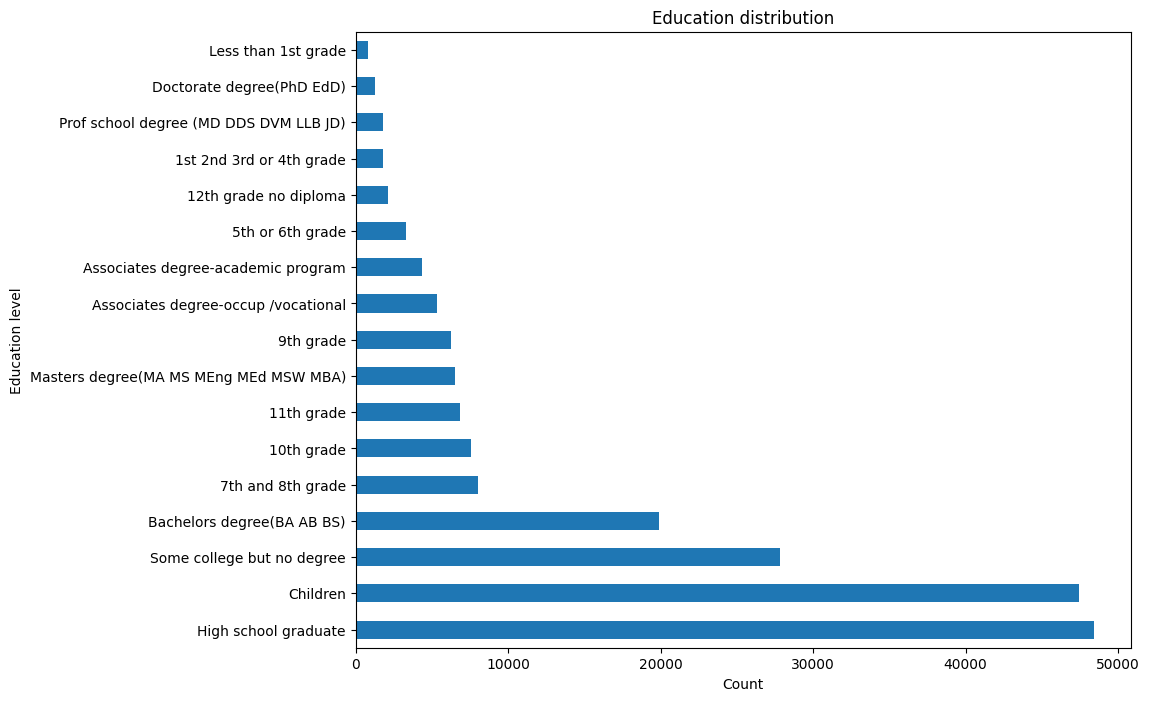

In [39]:
data['education'].value_counts()
data['education'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Education distribution')
plt.xlabel('Count')
plt.ylabel('Education level')
plt.show()

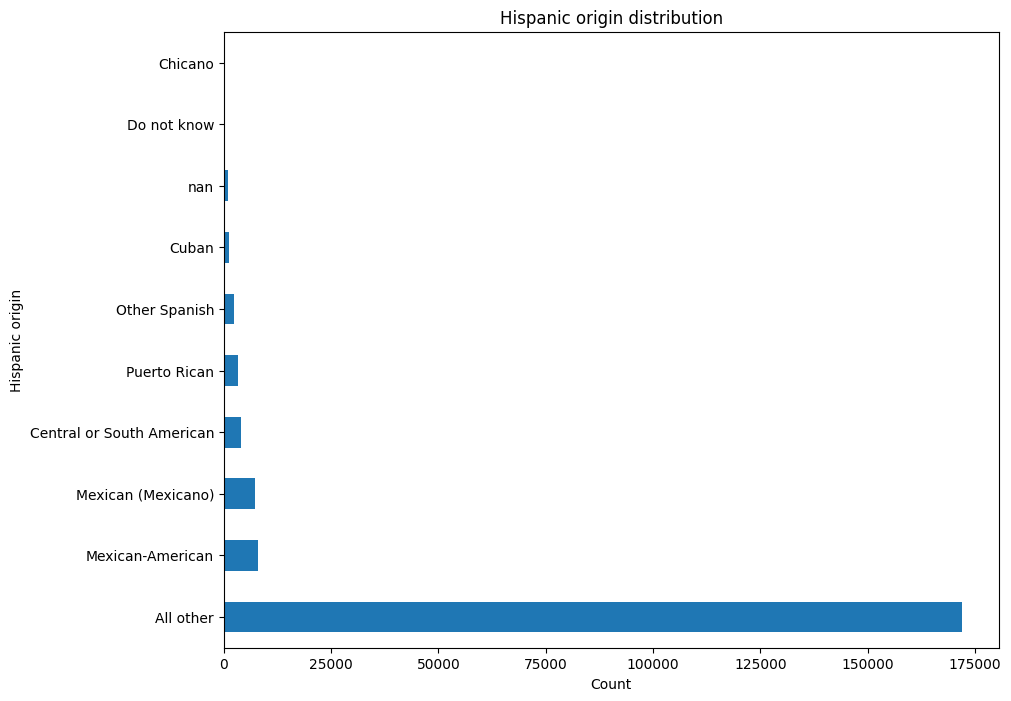

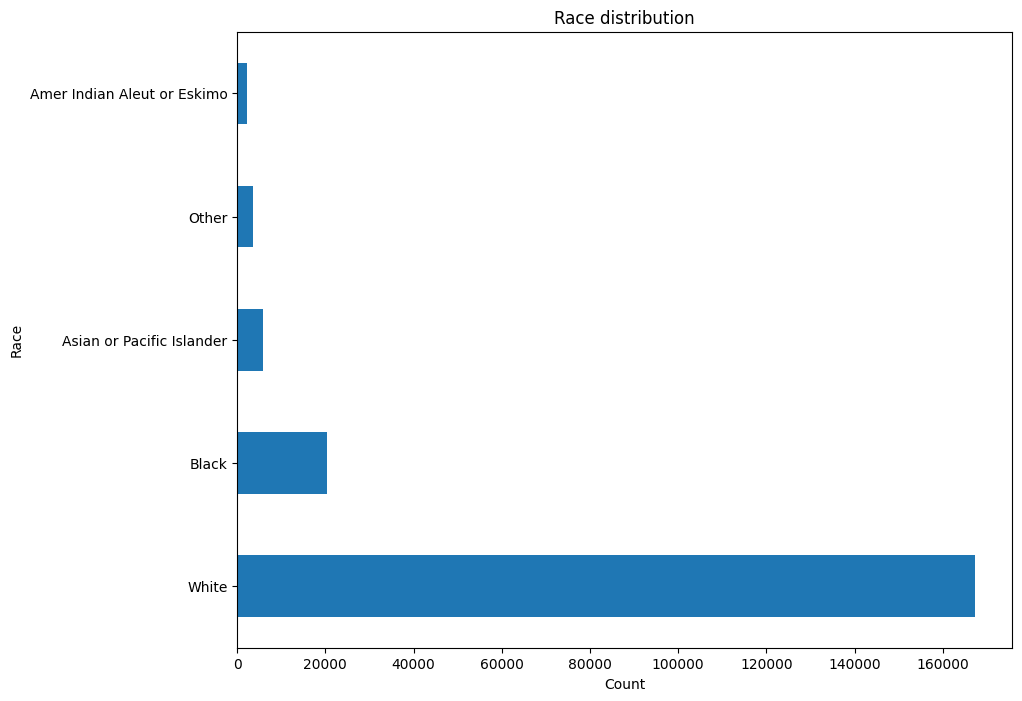

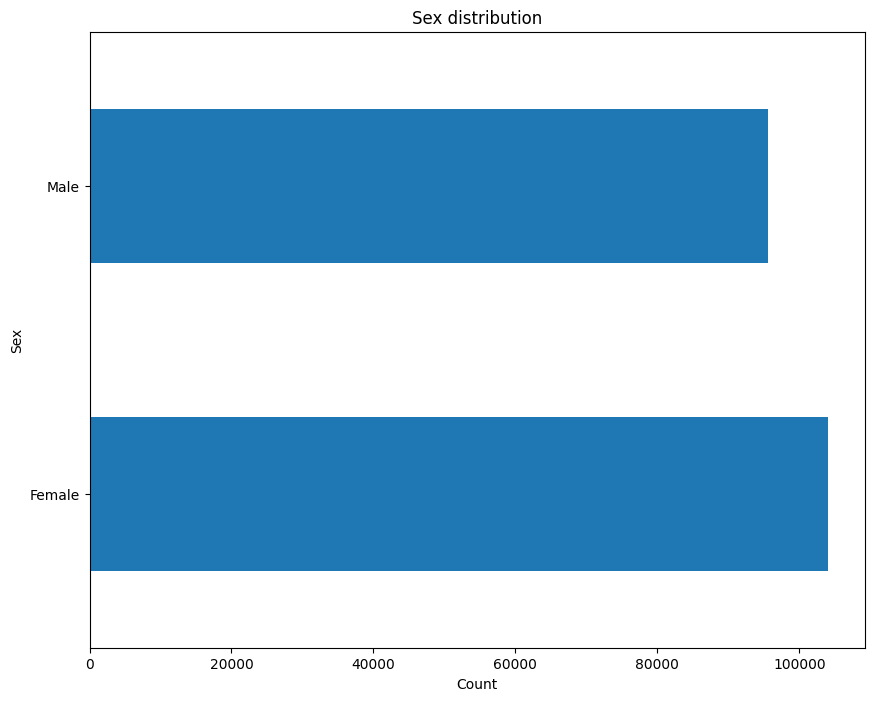

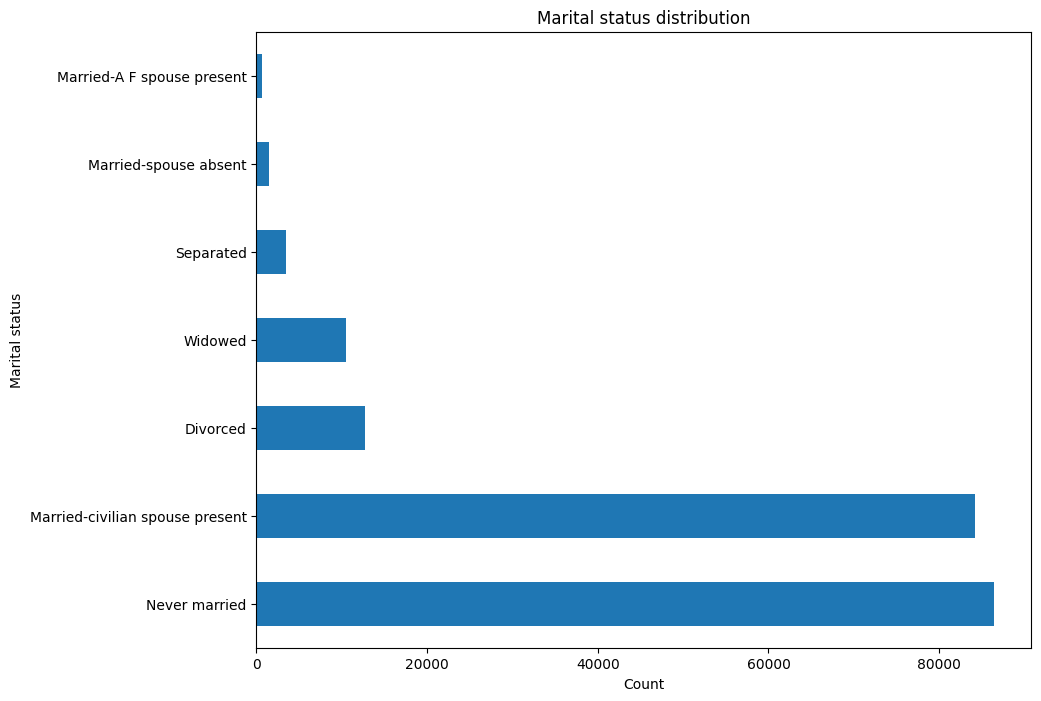

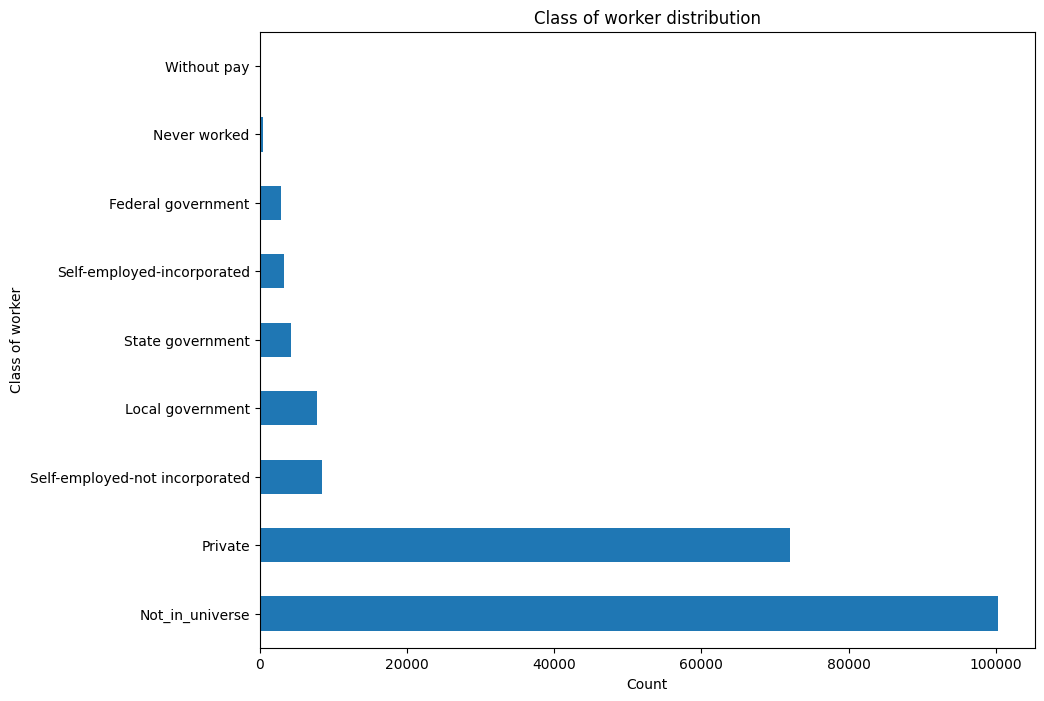

In [40]:
data['hispanic_origin'].value_counts()
data['hispanic_origin'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Hispanic origin distribution')
plt.xlabel('Count')
plt.ylabel('Hispanic origin')
plt.show()
data['race'].value_counts()
data['race'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Race distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()
data['sex'].value_counts()
data['sex'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Sex distribution')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()
data['marital_stat'].value_counts()
data['marital_stat'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Marital status distribution')
plt.xlabel('Count')
plt.ylabel('Marital status')
plt.show()
data['class_of_worker'].value_counts()
data['class_of_worker'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Class of worker distribution')
plt.xlabel('Count')
plt.ylabel('Class of worker')
plt.show()
    

**Race:**

The race variable follows standard CPS classifications used during the 1994–1995 survey period. All observed categories are valid and complete. The distribution is highly imbalanced, reflecting population composition at the time. 

**Hispanic_origin**:

If we look into hispanic origin, it gets sparse with lot of categories, and not nec essarily helpful, hence we condense it into correct categories. In CPS terminology, the hispanic_origin variable distinguishes respondents of Hispanic origin from non-Hispanic respondents. The category “All other” represents individuals not of Hispanic origin, while the remaining categories specify Hispanic subgroups. This interpretation aligns with standard Census definitions of ethnicity.

Hence "nan", "do not know" are relabeled as Unknown, while "All other" is relabeled as "not hispanic", and other hispanic origins to "Hispanic".



In [41]:
data['hispanic_origin'] = data['hispanic_origin'].replace({
    'Mexican-American': 'Hispanic',
    'Mexican (Mexicano)': 'Hispanic',
    'Chicano': 'Hispanic',
    'Puerto Rican': 'Hispanic',
    'Cuban': 'Hispanic',
    'Central or South American': 'Hispanic',
    'Other Spanish': 'Hispanic',
    'All other': 'Not Hispanic',
    'Do not know': 'Unknown',
    'nan': 'Unknown'
})



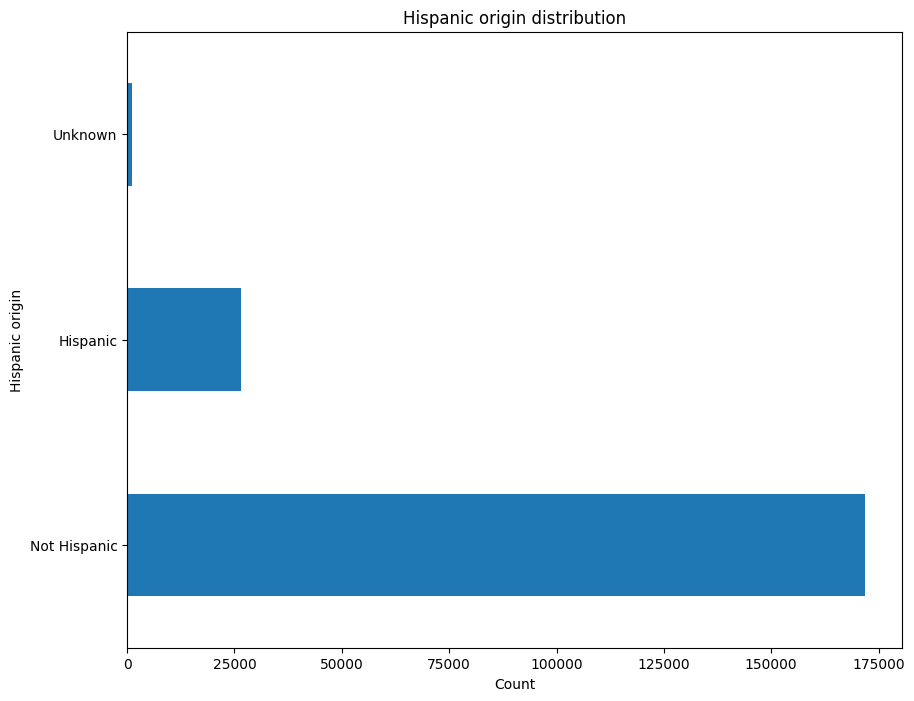

In [42]:
data['hispanic_origin'].value_counts()
data['hispanic_origin'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Hispanic origin distribution')
plt.xlabel('Count')
plt.ylabel('Hispanic origin')
plt.show()

In [43]:
data.columns

Index(['age', 'class_of_worker', 'detailed_industry_recode',
       'detailed_occupation_recode', 'education', 'wage_per_hour',
       'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code',
       'major_occupation_code', 'race', 'hispanic_origin', 'sex',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses',
       'dividends_from_stocks', 'tax_filer_stat',
       'region_of_previous_residence', 'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'weight',
       'migration_codechange_in_msa', 'migration_codechange_in_reg',
       'migration_codemove_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'own_b

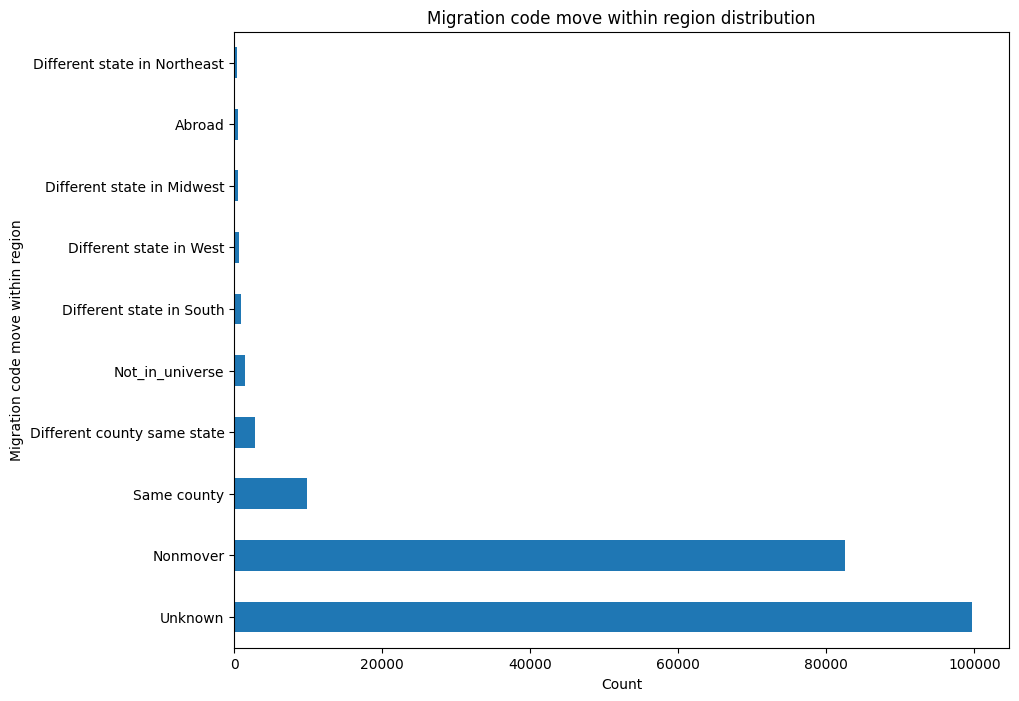

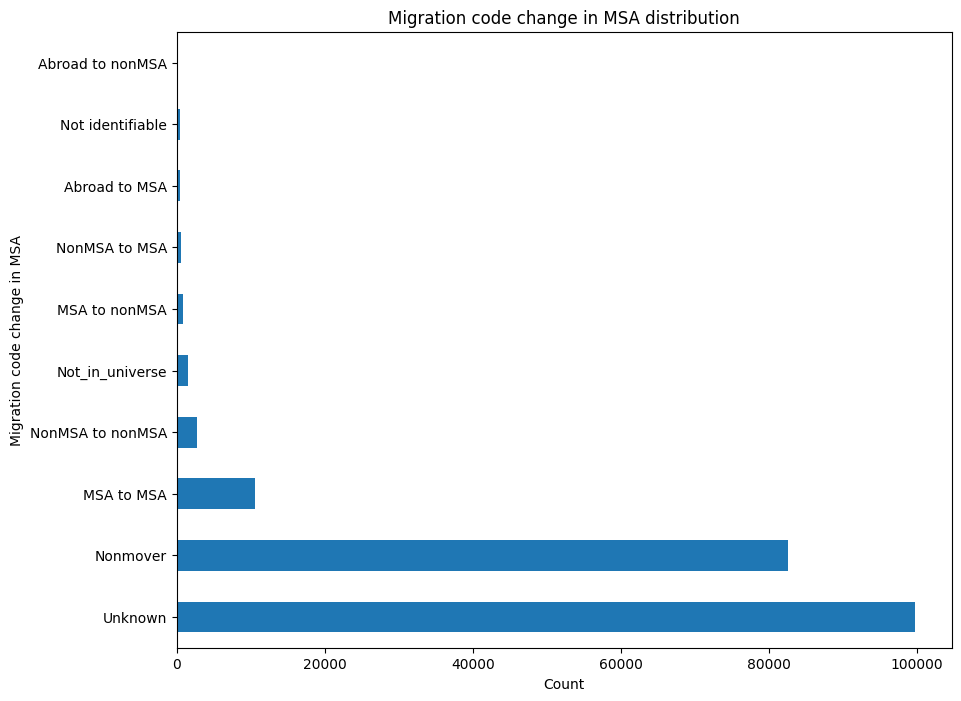

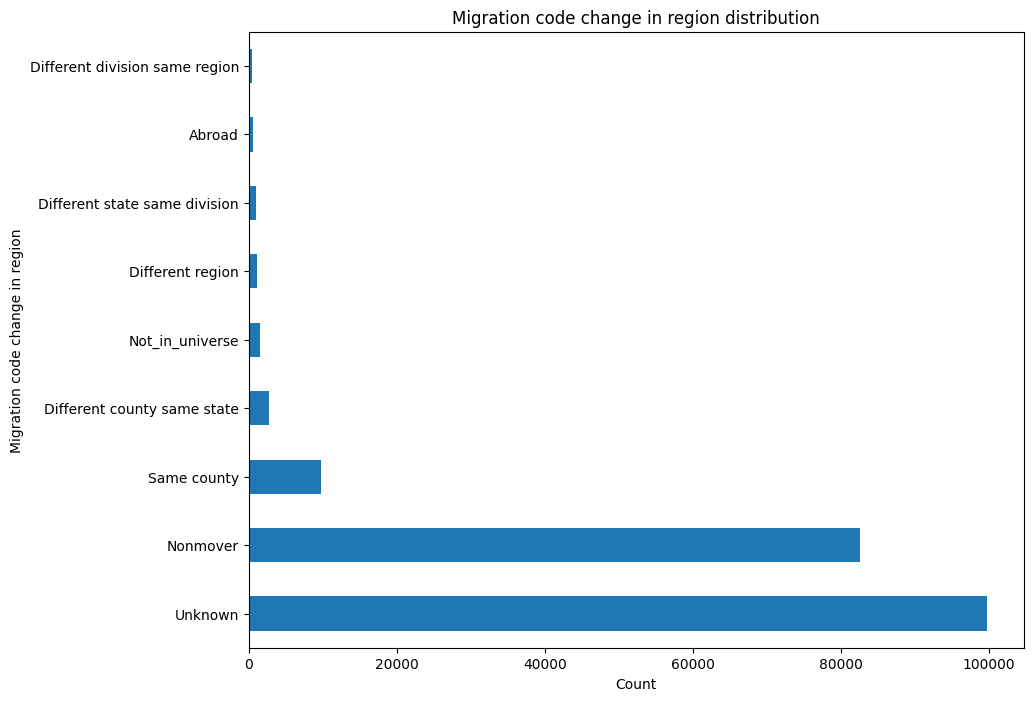

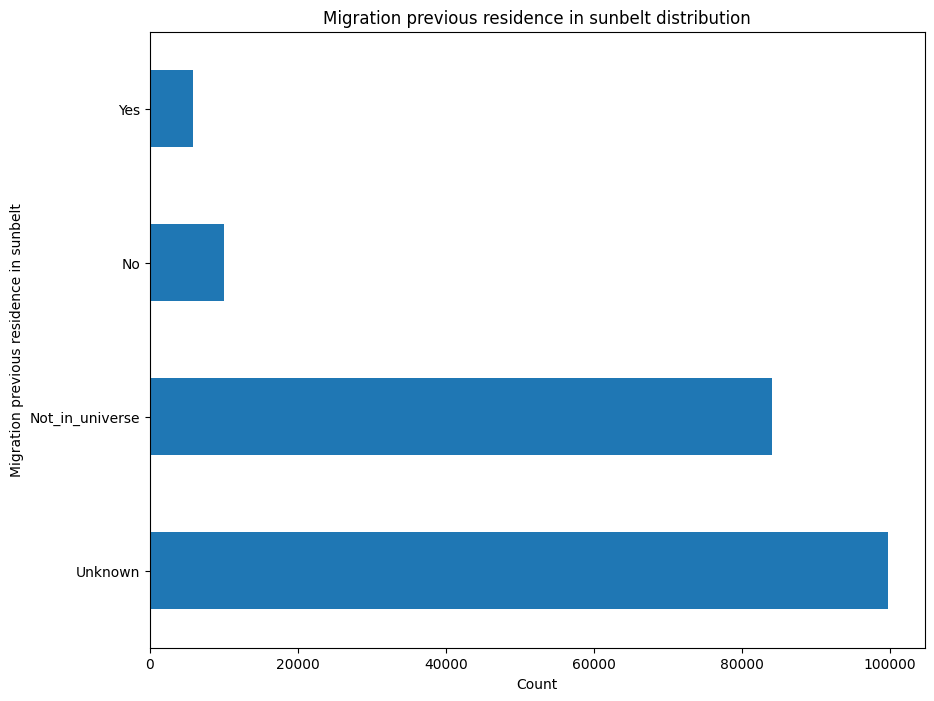

In [44]:
data['migration_codemove_within_reg'].value_counts()
data['migration_codemove_within_reg'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Migration code move within region distribution')
plt.xlabel('Count')
plt.ylabel('Migration code move within region')
plt.show()
data['migration_codechange_in_msa'].value_counts() 
data['migration_codechange_in_msa'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Migration code change in MSA distribution')
plt.xlabel('Count')
plt.ylabel('Migration code change in MSA')
plt.show()
data['migration_codechange_in_reg'].value_counts()
data['migration_codechange_in_reg'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Migration code change in region distribution')
plt.xlabel('Count')
plt.ylabel('Migration code change in region')
plt.show()
data['migration_prev_res_in_sunbelt'].value_counts()
data['migration_prev_res_in_sunbelt'].value_counts().plot(kind='barh', figsize=(10,8))  
plt.title('Migration previous residence in sunbelt distribution')
plt.xlabel('Count')
plt.ylabel('Migration previous residence in sunbelt')
plt.show()


### Correlations and pairwise relationships

Correlation matrix for numerical features and heatmap showing the correlations

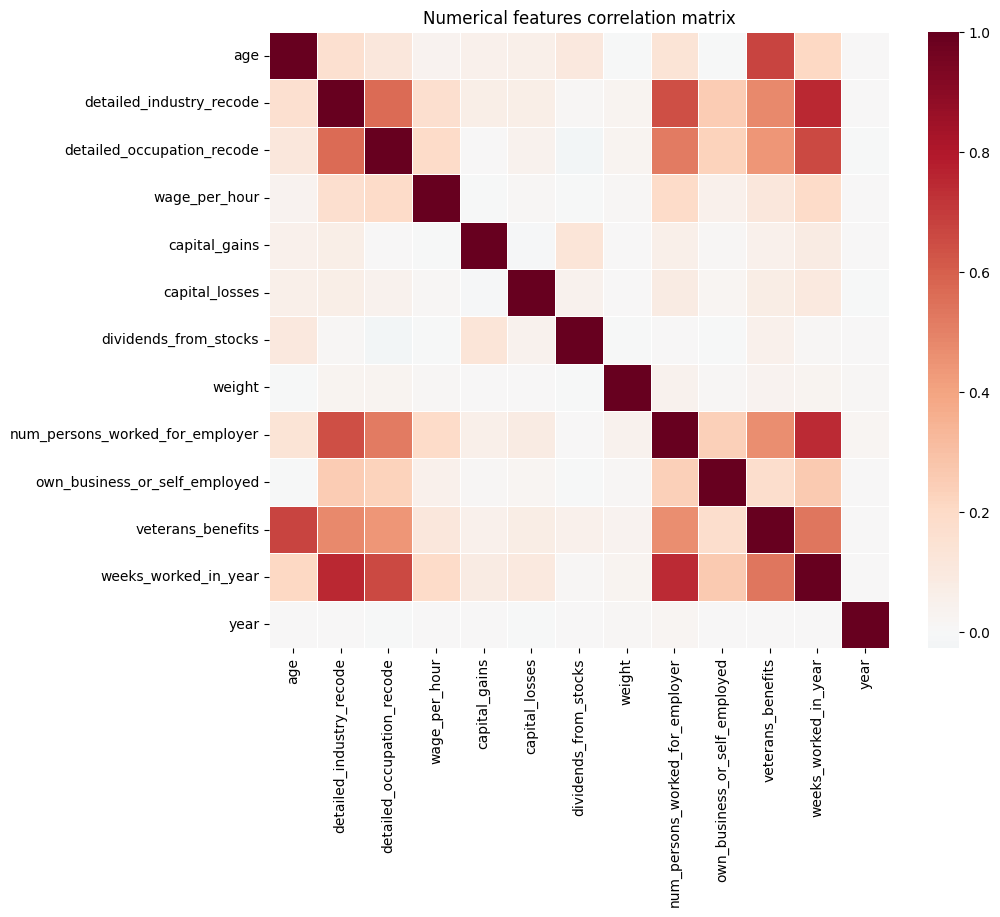

detailed_industry_recode         weeks_worked_in_year               0.754472
weeks_worked_in_year             detailed_industry_recode           0.754472
                                 num_persons_worked_for_employer    0.747302
num_persons_worked_for_employer  weeks_worked_in_year               0.747302
veterans_benefits                age                                0.674844
age                              veterans_benefits                  0.674844
detailed_occupation_recode       weeks_worked_in_year               0.655613
weeks_worked_in_year             detailed_occupation_recode         0.655613
detailed_industry_recode         num_persons_worked_for_employer    0.642096
num_persons_worked_for_employer  detailed_industry_recode           0.642096
dtype: float64

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)
plt.title('Numerical features correlation matrix')
plt.show()

# Show top absolute correlations (excluding self-correlations)
corr_abs = corr.abs().where(~np.eye(corr.shape[0],dtype=bool))
pairs = (corr_abs.unstack().dropna().sort_values(ascending=False))
display(pairs.head(10))

### Distributions and class-conditional differences

Plot distributions for selected numeric features and compare across the two target classes.

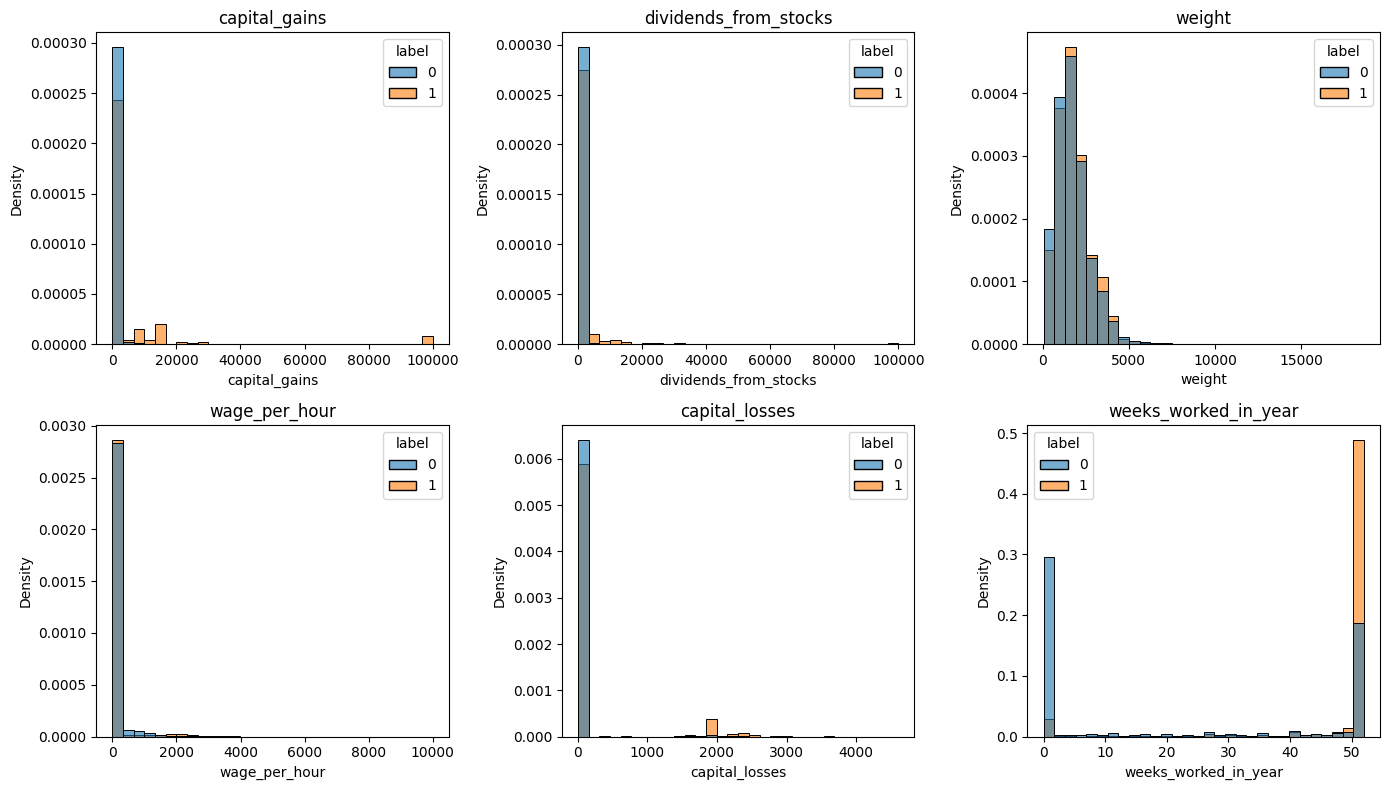

In [46]:
# We choose up to 6 numerical columns to plot (most variance)
target_col = data['label']
cols = num.var().sort_values(ascending=False).head(6).index.tolist()
cols
plt.figure(figsize=(14, 8))
for i, c in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data, x=c, hue=target_col, stat='density', common_norm=False, bins=30, alpha=0.6)
    plt.title(c)
plt.tight_layout()
plt.show()

# Special Insights - EDA

### 1. Comparison between weighted target class in 1994 and 1995.

In [47]:
def weighted_rate(y, w):
    y = pd.Series(y).astype(float)
    w = pd.Series(w).astype(float)
    return (y * w).sum() / w.sum()

# overall
print("Unweighted >50K rate:", (data['label'] == 1).mean())
print("Weighted >50K rate:", weighted_rate((data['label'] == 1), data['weight']))

# by year
year_summary = (
    data.groupby('year')
        .apply(lambda g: pd.Series({
            "n": len(g),
            "unweighted_rate": (g['label'] == 1).mean(),
            "weighted_rate": weighted_rate((g['label'] == 1), g['weight'])
        }))
)
display(year_summary)


Unweighted >50K rate: 0.06205800834991455
Weighted >50K rate: 0.06405041998278356


/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1086201923.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('year')
/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1086201923.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,n,unweighted_rate,weighted_rate
year,,,
1994,99827.0,0.058491,0.060643
1995,99696.0,0.065630,0.067417


There hasn't been significant difference in >50K income among people in 1994 and 1995, however we can see some improvement.

- 1994: ~6.1% earn >50K
- 1995: ~6.7% earn >50K

**One observation and important step to consider during modeling:**

The income classes are naturally imbalanced, with approximately 6–7% of individuals earning more than $50K, consistent across survey years. Rather than artificially rebalancing the data, this imbalance should be addressed through appropriate evaluation metrics( ROC-AUC, precision–recall metrics instead of Accuracy) and class-weighted learning instead of resampling, to preserve the true population distribution. We also would need to set correct business-driven threshold for marketing instead of blindly going for default threshold of 0.5

### 2. Numeric feature association with label(weighted)

In [48]:
data.select_dtypes(include=['int64','float64']).columns.tolist()

['age',
 'detailed_industry_recode',
 'detailed_occupation_recode',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'weight',
 'num_persons_worked_for_employer',
 'weeks_worked_in_year']

In [49]:
print("Capital gains distribution")
display(data.groupby('label')['capital_gains'].describe(percentiles=[.5, .9, .95, .99]))
print("Capital losses distribution")
display(data.groupby('label')['capital_losses'].describe(percentiles=[.5, .9, .95, .99]))
print("Dividends from stocks distribution")
display(data.groupby('label')['dividends_from_stocks'].describe(percentiles=[.5, .9, .95, .99]))

Capital gains distribution


/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1921179673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data.groupby('label')['capital_gains'].describe(percentiles=[.5, .9, .95, .99]))


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
0,187141.0,143.848013,1815.343341,0.0,0.0,0.0,0.0,4508.0,99999.0
1,12382.0,4830.930060,16887.627002,0.0,0.0,15024.0,15024.0,99999.0,99999.0


Capital losses distribution


/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1921179673.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data.groupby('label')['capital_losses'].describe(percentiles=[.5, .9, .95, .99]))


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
0,187141.0,27.003730,229.535067,0.0,0.0,0.0,0.0,1669.0,4608.0
1,12382.0,193.139557,607.542507,0.0,0.0,0.0,1977.0,2415.0,3683.0


Dividends from stocks distribution


/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1921179673.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data.groupby('label')['dividends_from_stocks'].describe(percentiles=[.5, .9, .95, .99]))


,count,mean,std,min,50%,90%,95%,99%,max
label,,,,,,,,,
0,187141.0,107.816518,909.774217,0.0,0.0,0.0,175.0,2900.0,39000.0
1,12382.0,1553.448070,6998.071762,0.0,0.0,2500.0,7000.0,32000.0,99999.0


**Medians are all at 0, but the tail is at 5-10%, hence we can say high-income individuals are not universally earning investment income, but a small fraction of them earn very large investment income, which drives strong separation between the income groups(<50K and >50K).This shows how capital gains, capital losses and dividends from stocks are highly skewed for label=1. Meaning higher income groups have these investments high, hence more gains, more losses and high dividends from stocks too.**

In [50]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ['detailed_industry_recode', 'detailed_occupation_recode','weight']] # detailed recodes columns are numeric codes, but not numeric quantities, so their mean and median values are not meaningful.
if 'label' in num_cols:
    num_cols.remove('label')

def weighted_mean(x, w):
    return (x * w).sum() / w.sum()
#rows with larger weight count more, because each row represents more people in the population.

rows = []
for c in num_cols:
    for yval in [0, 1]:
        g = data.loc[data['label'] == yval, [c, 'weight']].dropna()
        rows.append({
            "feature": c,
            "label": yval,
            "w_mean": weighted_mean(g[c], g['weight']),
            "median": g[c].median()
        })

num_summary = pd.DataFrame(rows)
pivot = num_summary.pivot(index='feature', columns='label', values='w_mean')
pivot.columns = ['w_mean_0', 'w_mean_1']
pivot['delta_mean'] = pivot['w_mean_1'] - pivot['w_mean_0']
pivot = pivot.sort_values('delta_mean', ascending=False)

display(pivot)

,w_mean_0,w_mean_1,delta_mean
feature,,,
capital_gains,144.574620,4781.242068,4636.667448
dividends_from_stocks,109.484703,1483.940367,1374.455664
capital_losses,27.872649,194.792756,166.920107
weeks_worked_in_year,21.900271,48.163953,26.263682
wage_per_hour,55.723077,81.373316,25.650239
age,33.676008,46.129831,12.453824
num_persons_worked_for_employer,1.876119,4.028065,2.151947


**Insights: As per their mean difference (high to low)**

1. Investment-related variables dominate separation
- Capital gains and dividends show the largest gaps
- These are driven by a small but influential subset of high-income individuals

2. Labor-market 
- High earners work more weeks per year
- They earn higher hourly wages

3. Demographics
- High earners are older on average
- They are more likely to work in larger organizations

Overall, Investment-related variables are highly right-skewed and primarily distinguish income groups through extreme values among high earners, while labor intensity and wage levels provide more consistent separation across the population.

### 3. Categorical feature association with label(weighted)

We compute the weighted probability of earning more than $50K conditional on each category value.

In [51]:
data.select_dtypes(include=['object','category']).columns.tolist()

['class_of_worker',
 'education',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'migration_codechange_in_msa',
 'migration_codechange_in_reg',
 'migration_codemove_within_reg',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'family_members_under_18',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 'fill_inc_questionnaire_for_veterans_admin',
 'veterans_benefits',
 'year',
 'label']

##### 1) Education:

In [52]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: education
edu_uplift = cat_uplift_table(data, 'education', min_support=100)
display(edu_uplift)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1416462055.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,education,support,n_rows,pos_rate_w
15,Prof school degree (MD DDS DVM LLB JD),3155198.08,1793.0,0.538923
11,Doctorate degree(PhD EdD),2223026.44,1263.0,0.526257
14,Masters degree(MA MS MEng MEd MSW MBA),11475673.95,6541.0,0.315950
9,Bachelors degree(BA AB BS),35738476.21,19865.0,0.203474
7,Associates degree-academic program,7923965.51,4363.0,0.096324
8,Associates degree-occup /vocational,9186755.06,5358.0,0.075936
16,Some college but no degree,50296154.39,27820.0,0.064957
12,High school graduate,85589219.42,48407.0,0.037622
2,12th grade no diploma,3760879.44,2126.0,0.014814
1,11th grade,12290046.29,6876.0,0.010311


**This table for "Education" basically explains:**

For people with this education level, how big is the group, how reliable is the estimate, and how likely are they to earn >$50K(Weighted probability that a person in this category earns > $50K)?

Support(It is sum of population group, basically, the approximate number of people in the U.S. population represented by a category), as each data row here is not for a person but for a sample.


##### Insights:

1. Above 50% of people with Professional school degree(MD DDS DVM LLB JD) and Doctorate Degree(PhD EdD) make >$50K income
2. Above 30% of people with Masters Degree make >50K
3. As expected, associate degree or lower have <10% people earning an income >$50K

##### 2) Class of Worker:

In [53]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: class_of_worker
cow_uplift = cat_uplift_table(data, 'class_of_worker', min_support=100)
display(cow_uplift)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/252951564.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,class_of_worker,support,n_rows,pos_rate_w
5,Self-employed-incorporated,5.652140e+06,3265.0,0.362642
0,Federal government,5.053904e+06,2925.0,0.210753
6,Self-employed-not incorporated,1.451549e+07,8445.0,0.132921
7,State government,7.165721e+06,4227.0,0.117224
1,Local government,1.374835e+07,7784.0,0.112191
4,Private,1.291665e+08,72028.0,0.102234
3,Not_in_universe,1.708704e+08,100245.0,0.009402
2,Never worked,8.076583e+05,439.0,0.002939
8,Without pay,2.657429e+05,165.0,0.001849


Insights from **Class_of_worker:**
- We have too many "Not in universe"
- Self-employed- incorporated have highest probability of people(36%) with >$50K income, followed by Federal govt. 
- Private, local & State government class of worker have only 10-14% of people with >$50K income.

##### 3) Marital Status:

In [54]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: marital_stat
marital_uplift = cat_uplift_table(data, 'marital_stat', min_support=100)
display(marital_uplift)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/2227035952.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,marital_stat,support,n_rows,pos_rate_w
2,Married-civilian spouse present,1.444042e+08,84222.0,0.119349
0,Divorced,2.317747e+07,12710.0,0.080676
3,Married-spouse absent,2.648742e+06,1518.0,0.055974
5,Separated,6.448192e+06,3460.0,0.050372
6,Widowed,1.754912e+07,10463.0,0.031974
1,Married-A F spouse present,1.100045e+06,665.0,0.024952
4,Never married,1.519181e+08,86485.0,0.013660


1. Marriage is strongly associated with higher income

Married – civilian spouse present
- pos_rate_w ≈ 11.9%
- One of the largest population groups
- Highest income likelihood among major categories
- This is almost 9× higher than never-married individuals.

Interpretation:
- Dual-income households
- Greater labor market stability
- Older average age and career stage

2. Never-married individuals have the lowest income likelihood

- pos_rate_w ≈ 1.37%
- Largest population group by support
- Lowest likelihood of earning >$50K

Interpretation:
- Younger individuals
- Early-career workers
- Single-income households
This is a major segmentation insight.

3. Previously married groups fall in the middle

- Divorced → ~8.1%
- Married-spouse absent → ~5.6%
- Separated → ~5.0%
- Widowed → ~3.2%

Interpretation:
- Partial loss of household income
- Older but often single-income
- Mixed employment stability
These groups consistently earn less than married-with-spouse-present, but more than never-married.

4. Armed Forces spouse category is small and unstable
Married – Armed Forces spouse present

- pos_rate_w ≈ 2.5%
- Very small sample (n_rows = 665)

Interpretation:
- Statistically less stable financially

**Household structure is one of the strongest categorical predictors of income, with married individuals—especially those with a spouse present—substantially more likely to earn above $50K.**

##### 4) Sex:

In [55]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: sex
sex_uplift = cat_uplift_table(data, 'sex', min_support=100)
display(sex_uplift)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/3462416060.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,sex,support,n_rows,pos_rate_w
1,Male,1.694427e+08,95539.0,0.103222
0,Female,1.778032e+08,103984.0,0.026721


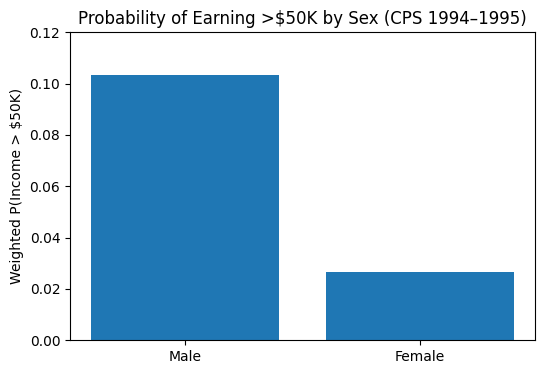

In [56]:
plt.figure(figsize=(6,4))
plt.bar(['Male','Female'], [0.103222, 0.026721])
plt.ylabel('Weighted P(Income > $50K)')
plt.title('Probability of Earning >$50K by Sex (CPS 1994–1995)')
plt.ylim(0, 0.12)
plt.show()

**Insights:**

- Males and females have similar population support (roughly equal representation)
- But the probability of earning >$50K differs sharply:
  - ~10.3% of males earn >$50K
  - ~2.7% of females earn >$50K
- This is almost a 4× difference
- This reflects labor market structure in the mid-1990s:
- Differences likely relate to:
  - occupational segregation
  - labor force participation
  - hours worked
  - seniority and tenure
  - historical wage gaps

##### 5) Tax Filing:

In [57]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: tax_filer
tax_filer_uplift = cat_uplift_table(data, 'tax_filer_stat', min_support=100)
display(tax_filer_uplift)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/2777566971.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,tax_filer_stat,support,n_rows,pos_rate_w
2,Joint both under 65,1.156458e+08,67383.0,0.137532
3,Joint one under 65 & one 65+,6.653446e+06,3867.0,0.081449
0,Head of household,1.317818e+07,7426.0,0.060355
5,Single,6.951902e+07,37421.0,0.059625
1,Joint both 65+,1.435770e+07,8332.0,0.055546
4,Nonfiler,1.278918e+08,75094.0,0.000441


**Insights from tax_filer_stat:**

- Joint filers under 65 have the highest likelihood of earning >$50K : Individuals filing jointly with both spouses under 65 show the highest income likelihood (~13.8%), reflecting dual-income households and peak earning years.
- Joint filing consistently outperforms single or head-of-household filing: All joint filing categories have higher income likelihoods than single and head-of-household filers, highlighting the income advantage associated with combined household earnings when atleast one is under 65.
- Nonfilers have a ~0% probability of earning more than $50K, making this category a strong indicator of low income.

**Tax filing status is a strong proxy for household income structure, with joint filers—especially those under 65—significantly more likely to earn above $50K, while nonfilers overwhelmingly fall below the threshold.**

##### 6) Full or part-time employment:

In [58]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: Full or part time employment status
full_or_parttime_uplift = cat_uplift_table(data, 'full_or_part_time_employment_stat', min_support=100)
display(full_or_parttime_uplift)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/4127539522.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,full_or_part_time_employment_stat,support,n_rows,pos_rate_w
1,Full-time schedules,7.263862e+07,40736.0,0.133330
4,PT for econ reasons usually PT,2.160595e+06,1209.0,0.129689
5,PT for non-econ reasons usually FT,5.997410e+06,3322.0,0.115320
3,PT for econ reasons usually FT,9.507238e+05,525.0,0.066084
0,Children or Armed Forces,2.129070e+08,123769.0,0.049472
6,Unemployed full-time,4.214827e+06,2311.0,0.033754
7,Unemployed part- time,1.535414e+06,843.0,0.021033
2,Not in labor force,4.684131e+07,26808.0,0.017379


**Insights from full_or_part_time_employment_stat:**

* Full-time workers are the most likely to earn more than $50K.
* Part-time workers who are usually part-time can still have high income likelihood - maybe due to high hourly wages, multiple income sources
or secondary earners in households
* Workers who are usually full-time but forced into part-time work have lower income likelihood.
* Unemployed and not-in-labor-force individuals rarely earn more than $50K.
* Children and Armed Forces form a large group with low probability of high income.


##### 7) Major occupation code:

In [59]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: Major occupation code
major_occupation = cat_uplift_table(data, 'major_occupation_code', min_support=100)
display(major_occupation)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/2251827608.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,major_occupation_code,support,n_rows,pos_rate_w
2,Executive admin and managerial,2.219117e+07,12495.0,0.290557
10,Professional specialty,2.461443e+07,13940.0,0.254143
11,Protective services,3.179314e+06,1661.0,0.156763
12,Sales,2.121534e+07,11783.0,0.132666
13,Technicians and related support,5.460453e+06,3018.0,0.119937
8,Precision production craft & repair,1.884325e+07,10518.0,0.088870
14,Transportation and material moving,7.265852e+06,4020.0,0.063909
3,Farming forestry and fishing,5.177166e+06,3146.0,0.043498
5,Machine operators assmblrs & inspctrs,1.133860e+07,6379.0,0.038257
0,Adm support including clerical,2.635368e+07,14837.0,0.030261


Insights from **Major occupation code:**

- Executive, administrative, and managerial roles have the highest likelihood of earning more than $50K (29%)
- Professional specialty occupations also show a very high income likelihood. (25%)
- Protective services and sales occupations fall in the mid-to-high income range. (13-15%)
- Technical and skilled trade roles show moderate income likelihood.
- Transportation, farming, and machine operation roles have lower income likelihood.(<10%)
- Clerical, service, and private household service occupations are least likely to exceed $50K.
- Individuals not in the labor force rarely earn more than $50K.

##### 8) Major industry code:

In [60]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: Major industry code
major_industry = cat_uplift_table(data, 'major_industry_code', min_support=100)
display(major_industry)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/1816048009.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,major_industry_code,support,n_rows,pos_rate_w
13,Mining,8.755347e+05,563.0,0.302684
15,Other professional services,8.053509e+06,4482.0,0.235877
3,Communications,2.078938e+06,1181.0,0.229100
22,Utilities and sanitary services,2.139292e+06,1178.0,0.211755
7,Finance insurance and real estate,1.109837e+07,6145.0,0.184024
18,Public administration,8.169593e+06,4610.0,0.182214
10,Manufacturing-durable goods,1.648992e+07,9015.0,0.168029
23,Wholesale trade,6.456143e+06,3596.0,0.155474
8,Forestry and fisheries,2.526702e+05,187.0,0.147306
11,Manufacturing-nondurable goods,1.219977e+07,6897.0,0.127623


Insights from **Major industry code**:

- Mining(highest - 30%) and professional services, communications, utilities, and sanitary services have the highest likelihood of earning more than $50K. (>20%)
- Finance, Manufacturing, public administration, and wholesale trade fall in the mid-to-high income range. (15-20%)
- Healthcare and education industries show moderate income likelihood. (10-12.5%)
- Construction and entertainment industries have lower income likelihood.
- Retail, personal services, and social services are among the lowest-income industries.
- Individuals not in the labor force or in private household services rarely earn more than $50K.

#### 9) Sources of Income:

This is an interesting insight to see "What actually differentiates people who earn more than $50K?" as:
- Income > $50K is not driven by a single source

High-income individuals typically have:
- High labor income (wage × weeks worked, full-time)
- Non-zero capital income (capital gains, dividends)

Lower-income individuals:
- Often have low weeks worked OR part-time status
- Mostly zero capital income

In [68]:
data['labor_income_proxy'] = (
    data['wage_per_hour'].fillna(0) * data['weeks_worked_in_year'].fillna(0)
)

data['net_capital_income'] = (
    data['capital_gains'].fillna(0) - data['capital_losses'].fillna(0)
)

def nonzero_rate(s):
    return (s > 0).mean()

data.groupby('label').agg({
    'labor_income_proxy': nonzero_rate,
    'net_capital_income': nonzero_rate,
    'dividends_from_stocks': nonzero_rate
})

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/3323679831.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('label').agg({


,labor_income_proxy,net_capital_income,dividends_from_stocks
label,,,
0,0.055931,0.026541,0.084589
1,0.044742,0.194799,0.428929


- High-income individuals are far more likely to have investment income.
- Nearly 43% of people earning more than $50K receive dividends from stocks, compared to only about 8% among lower-income individuals.
- Capital income is a key differentiator between income groups.
- About 19% of high-income individuals report non-zero capital gains or losses, versus just 3% in the lower-income group.
- The likelihood of having positive labor income (wage × weeks worked) is similar across groups, indicating that employment participation alone is not sufficient to distinguish higher earners.
- High income is strongly associated with diversified income sources.
- Individuals earning more than $50K are much more likely to supplement labor income with investment-based income.

#### 10) Citizenship:

In [61]:
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'label']

def cat_uplift_table(df, col, label_col='label', wcol='weight', min_support=200):
    tmp = df[[col, label_col, wcol]].copy()
    tmp[col] = tmp[col].astype(str)

    # weighted positive rate per category
    grp = tmp.groupby(col).apply(
        lambda g: pd.Series({
            "support": g[wcol].sum(),                 # weighted support
            "n_rows": len(g),                         # raw rows
            "pos_rate_w": weighted_rate(g[label_col] == 1, g[wcol])
        })
    ).reset_index()

    # filter tiny groups (for stable insights)
    grp = grp[grp["n_rows"] >= min_support].sort_values("pos_rate_w", ascending=False)
    return grp

# example: Citizenship
citizenship = cat_uplift_table(data, 'citizenship', min_support=100)
display(citizenship)

/var/folders/cz/16rxwm6j2255gn5yyhbwzbjw0000gn/T/ipykernel_88507/2830922429.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = tmp.groupby(col).apply(


,citizenship,support,n_rows,pos_rate_w
1,Foreign born- U S citizen by naturalization,9.195009e+06,5855.0,0.104552
2,Native- Born abroad of American Parent(s),2.954360e+06,1756.0,0.076403
4,Native- Born in the United States,3.123912e+08,176992.0,0.064679
0,Foreign born- Not a citizen of U S,2.094453e+07,13401.0,0.038855
3,Native- Born in Puerto Rico or U S Outlying,1.760837e+06,1519.0,0.020078


* **Citizenship status shows a modest association with income**, with naturalized U.S. citizens having the highest likelihood of earning more than $50K, followed by native-born individuals.
* **Non-citizens and individuals born in U.S. territories have lower income likelihood**, reflecting differences in labor market access and employment opportunities.


I focused categorical analysis on variables with clear theoretical and practical links to income, such as education, marital status, employment type, occupation, and tax filing status. Variables with administrative coding ambiguity or weak interpretability were retained for modeling but not emphasized in exploratory analysis.

In [62]:
data.to_csv("final_data.csv", index=False)